# Challenge de LATAM para optar al cargo de Data Scientist
## Realizado por Matías López Portius.


### Librerías

In [1]:
import pandas as pd
from plotnine import *
from datetime import datetime
from numpy import linspace
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline  

# Librerías Machine Learning

#Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#procesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit,RepeatedStratifiedKFold

#Metricas
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


### Se carga el dataset

In [2]:
df = pd.read_csv("dataset_SCL.csv")

C:\Users\mlopez\AppData\Local\Temp\ipykernel_17276\1100006479.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.


## 1. How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?


### Exploración de datos

In [3]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


#### Casteo fecha

In [4]:
df.columns = df.columns.str.replace('-', '_')
df.Fecha_I = pd.to_datetime(df.Fecha_I, format="%Y-%m-%d %H:%M:%S")
df.Fecha_O = pd.to_datetime(df.Fecha_O, format="%Y-%m-%d %H:%M:%S")

df.Vlo_I = df.Vlo_I.astype('category') # SE DEFINE COMO CATEGORÍA YA QUE EXISTEN NUMERO DE VUELO CON LETRAS
df.Ori_I = df.Ori_I.astype('category')
df.Des_I = df.Des_I.astype('category')
df.Emp_I = df.Emp_I.astype('category')

df.Vlo_O = df.Vlo_O.astype('category')
df.Ori_O = df.Ori_O.astype('category')
df.Des_O = df.Des_O.astype('category')
df.Emp_O = df.Emp_O.astype('category')

df.DIANOM = df.DIANOM.astype('category')
df.TIPOVUELO = df.TIPOVUELO.astype('category')
df.OPERA = df.OPERA.astype('category')
df.SIGLAORI = df.SIGLAORI.astype('category')
df.SIGLADES = df.SIGLADES.astype('category')

df['Hora_I'] = df.Fecha_I.dt.time
df['Hora_O'] = df.Fecha_O.dt.time

df['datehour'] = df.Fecha_I.dt.hour


In [5]:
df.dtypes

Fecha_I      datetime64[ns]
Vlo_I              category
Ori_I              category
Des_I              category
Emp_I              category
Fecha_O      datetime64[ns]
Vlo_O              category
Ori_O              category
Des_O              category
Emp_O              category
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM             category
TIPOVUELO          category
OPERA              category
SIGLAORI           category
SIGLADES           category
Hora_I               object
Hora_O               object
datehour              int64
dtype: object

In [6]:
df.head()

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora_I,Hora_O,datehour
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,23:30:00,23:33:00,23
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,23:30:00,23:39:00,23
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,23:30:00,23:39:00,23
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,23:30:00,23:33:00,23
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,23:30:00,23:28:00,23


In [7]:
print(df.Ori_I.unique())
print(df.Ori_O.unique())
print(df.Des_I.unique())
print(df.Des_O.unique())

['SCEL']
Categories (1, object): ['SCEL']
['SCEL']
Categories (1, object): ['SCEL']
['KMIA', 'KDFW', 'SAEZ', 'CYYZ', 'LFPG', ..., 'SAWH', 'EGYP', 'SULS', 'SLCB', 'SARI']
Length: 64
Categories (64, object): ['CYYZ', 'EGLL', 'EGYP', 'KATL', ..., 'SULS', 'SUMU', 'YMML', 'YSSY']
['KMIA', 'KDFW', 'SAEZ', 'CYYZ', 'LFPG', ..., 'SPSO', 'SAWH', 'EGYP', 'SULS', 'SLCB']
Length: 63
Categories (63, object): ['CYYZ', 'EGLL', 'EGYP', 'KATL', ..., 'SULS', 'SUMU', 'YMML', 'YSSY']


Primeros hallazgos, solo hay información de despegues y existe al menos un codigo de aeropuerto que se planifica y no se operó

In [8]:
for i in df.Des_I.unique():
    if i not in df.Des_O.unique():
        print(i)

SEQU
SARI


como veo que hay dos en los que sucede, vere en la otra direccion.

In [9]:
for i in df.Des_O.unique():
    if i not in df.Des_I.unique():
        print(i)

KIAD


In [13]:
df.describe()

,DIA,MES,AÑO,datehour
count,68206.000000,68206.000000,68206.000000,68206.00000
mean,15.714790,6.622585,2017.000029,12.46125
std,8.782886,3.523321,0.005415,5.80101
min,1.000000,1.000000,2017.000000,0.00000
25%,8.000000,3.000000,2017.000000,8.00000
50%,16.000000,7.000000,2017.000000,13.00000
75%,23.000000,10.000000,2017.000000,17.00000
max,31.000000,12.000000,2018.000000,23.00000


##### Histograma de despegues

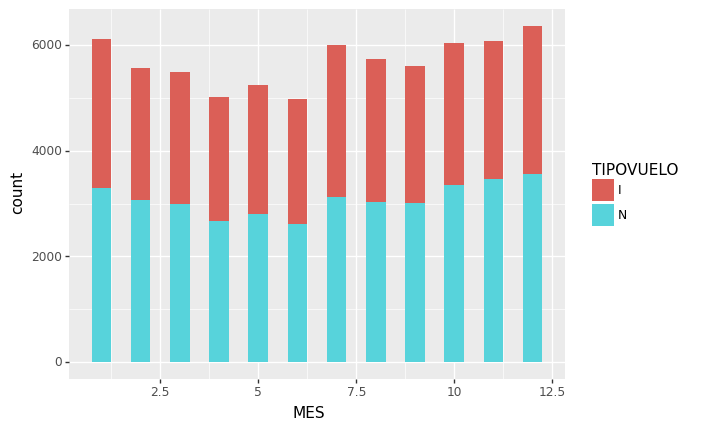

<ggplot: (180607619371)>

In [10]:
g = (
    ggplot(df, aes(x='MES', y=after_stat('count'),fill='TIPOVUELO'))
    + geom_histogram(binwidth=0.5)
    )
g

Podemos observar una alza en los meses de temporada alta o vacaciones.

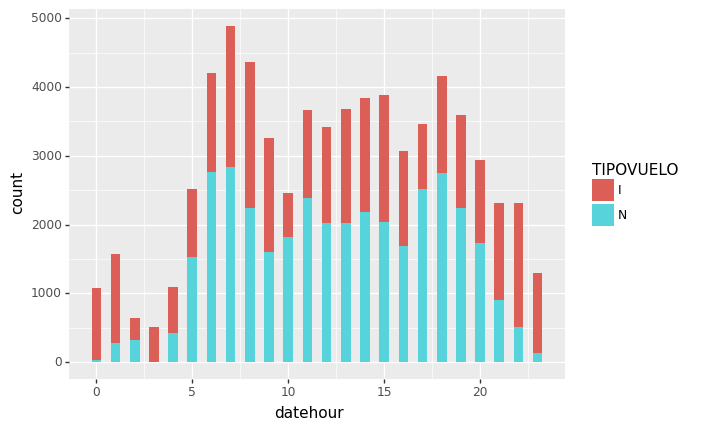

<ggplot: (180608105491)>

In [11]:
g = (
    ggplot(df, aes(x='datehour', y=after_stat('count'),fill='TIPOVUELO'))
    + geom_histogram(binwidth=0.5)
    )
g

Se visualiza una relacion con las horas laborables del día, los vuelos internacionales no se ven tan afectados por esto.

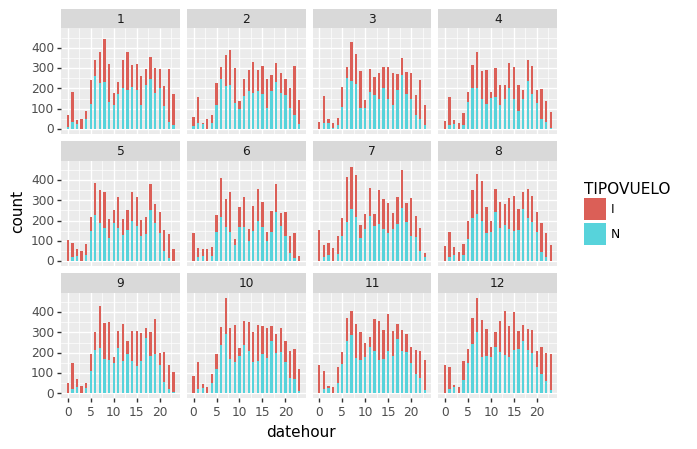

<ggplot: (180609363899)>

In [12]:
g = (
    ggplot(df, aes(x='datehour', y=after_stat('count'),fill='TIPOVUELO'))
    + geom_histogram(binwidth=0.5)
    + facet_wrap('MES')
    )
g

La estructura visualizada por la agrupaciones anual se mantiene en los meses del año por separado

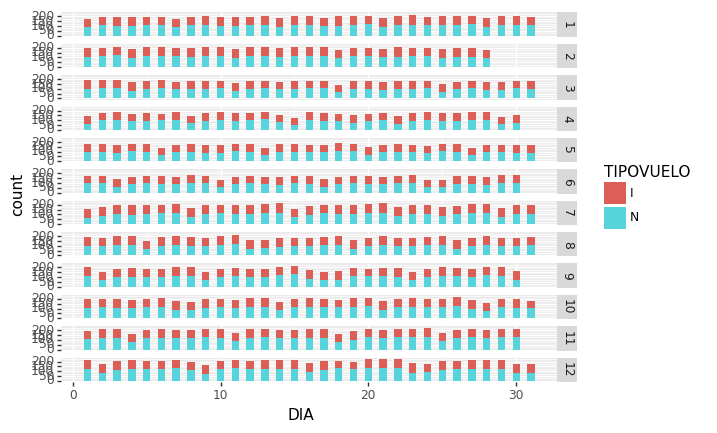

<ggplot: (180608104626)>

In [13]:
g = (
    ggplot(df, aes(x='DIA', y=after_stat('count'),fill='TIPOVUELO'))
    + facet_grid('MES~')
    + geom_histogram(binwidth=0.5)
    )
g

a nivel del día del mes no se visualiza claramente algun comportamiento.

Finalmene podemos concluir que hay una alta probabilidad que la hora del día tenga un alto poder predictivo a diferencia de lo que puede ser el tipo de vuelo.

## 2. Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv:

#### high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.

Buscamos que fechas hay disponibles en la data

In [16]:
print("fecha planificada minima: ",df['Fecha_I'].min())
print("fecha planificada maxima: ",df['Fecha_I'].max())
print('cantidad de años disponibles: ',df['AÑO'].unique())
df[df['AÑO']==2018]

fecha planificada minima:  2017-01-01 00:15:00
fecha planificada maxima:  2017-12-31 23:55:00
cantidad de años disponibles:  [2017 2018]


,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora_I,Hora_O,datehour
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,...,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles,23:55:00,00:02:00,23
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,...,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico,23:40:00,00:12:00,23


Se visualiza que solo hay informacion para vuelos programados en 2017 y los dos vuelos que aparecen con fecha 2018 fue por retraso.

Generamos los respectivos rangos para crear la nueva columna.

In [17]:
# <= 3-3-2017
date_fin_1_str = '3-3-2017'
date_fin_1 = datetime.strptime(date_fin_1_str, '%d-%m-%Y')

# 15-7-2017 -> 31-7-2017
date_inicio_2_str = '15-7-2017'
date_inicio_2 = datetime.strptime(date_inicio_2_str, '%d-%m-%Y')
date_fin_2_str = '31-7-2017'
date_fin_2 = datetime.strptime(date_fin_2_str, '%d-%m-%Y')

# 11-9-2017 -> 30-9-2017
date_inicio_3_str = '15-7-2017'
date_inicio_3 = datetime.strptime(date_inicio_3_str, '%d-%m-%Y')
date_fin_3_str = '31-7-2017'
date_fin_3 = datetime.strptime(date_fin_3_str, '%d-%m-%Y')

# >=
date_inicio_4_str = '15-12-2017'
date_inicio_4 = datetime.strptime(date_inicio_4_str, '%d-%m-%Y')

df['high_season']=0

df.loc[((df['Fecha_I'] <= date_fin_1) |
           ((df['Fecha_I'] >= date_inicio_2) & (df['Fecha_I'] <= date_fin_2)) |
           ((df['Fecha_I'] >= date_inicio_3) & (df['Fecha_I'] <= date_fin_3)) |
           (df['Fecha_I'] >= date_inicio_4))
           ,'high_season'] = 1
df.head()

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora_I,Hora_O,datehour,high_season
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,23:30:00,23:33:00,23,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,23:30:00,23:39:00,23,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,23:30:00,23:39:00,23,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,23:30:00,23:33:00,23,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,23:30:00,23:28:00,23,1


Verificamos si cuando es cero está en el rango:

In [18]:
df[df.high_season==0].head()

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora_I,Hora_O,datehour,high_season
11670,2017-03-04 23:30:00,226,SCEL,KMIA,AAL,2017-03-04 23:20:00,226,SCEL,KMIA,AAL,...,2017,Sabado,I,American Airlines,Santiago,Miami,23:30:00,23:20:00,23,0
11671,2017-03-06 23:00:00,226,SCEL,KMIA,AAL,2017-03-06 22:55:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,23:00:00,22:55:00,23,0
11672,2017-03-08 23:00:00,226,SCEL,KMIA,AAL,2017-03-08 22:54:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,23:00:00,22:54:00,23,0
11673,2017-03-11 22:00:00,226,SCEL,KMIA,AAL,2017-03-11 21:50:00,226,SCEL,KMIA,AAL,...,2017,Sabado,I,American Airlines,Santiago,Miami,22:00:00,21:50:00,22,0
11674,2017-03-13 22:00:00,226,SCEL,KMIA,AAL,2017-03-13 22:10:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,22:00:00,22:10:00,22,0


#### min_diff : difference in minutes between Date-O and Date-I .

In [19]:
df['min_diff']=(df['Fecha_O']-df['Fecha_I'])/pd.Timedelta(minutes=1)
df.head()

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora_I,Hora_O,datehour,high_season,min_diff
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,23:30:00,23:33:00,23,1,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,23:30:00,23:39:00,23,1,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,23:30:00,23:39:00,23,1,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,23:30:00,23:33:00,23,1,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,23:30:00,23:28:00,23,1,-2.0


#### delay_15 : 1 if min_diff > 15, 0 if not.

In [20]:
df['delay_15']=0

df.loc[df['min_diff'] > 15
           ,'delay_15'] = 1
df.head()

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,...,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora_I,Hora_O,datehour,high_season,min_diff,delay_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,23:30:00,23:33:00,23,1,3.0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,23:30:00,23:39:00,23,1,9.0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,23:30:00,23:39:00,23,1,9.0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,23:30:00,23:33:00,23,1,3.0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,23:30:00,23:28:00,23,1,-2.0,0


#### period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based onDate-I .

ocuparemos la columna datehour creada a partir de Date-I para la generacion de la categoría.

In [21]:
df['period_day']=''
df.loc[ (df['datehour'] < 5),'period_day'] = 'night'
df.loc[((df['datehour'] >= 5) & (df['datehour'] < 12)),'period_day'] = 'morning'  
df.loc[((df['datehour'] >= 12) & (df['datehour'] < 19)),'period_day'] = 'afternoon'    
df.loc[ (df['datehour'] >= 19),'period_day'] = 'night'
df.period_day = df.period_day.astype('category')       

df.head()

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,...,OPERA,SIGLAORI,SIGLADES,Hora_I,Hora_O,datehour,high_season,min_diff,delay_15,period_day
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,23:30:00,23:33:00,23,1,3.0,0,night
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,23:30:00,23:39:00,23,1,9.0,0,night
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,23:30:00,23:39:00,23,1,9.0,0,night
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,23:30:00,23:33:00,23,1,3.0,0,night
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,23:30:00,23:28:00,23,1,-2.0,0,night


#### Guardaremos la data con las nuevas columnas en el csv solicitado.

In [22]:
df_to_save = df[['Fecha_I', 'Vlo_I', 'Ori_I', 'Des_I', 'Emp_I', 'Fecha_O', 'Vlo_O',
               'Ori_O', 'Des_O', 'Emp_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
               'OPERA', 'SIGLAORI','SIGLADES', 'high_season', 'min_diff', 'delay_15', 'period_day']]
df_to_save.to_csv('synthetic_features.csv')

## 3. What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight?What variables would you expect to have the most influence in predicting delays?

### Destino

In [23]:
df_a = df.groupby('SIGLADES').apply(lambda x: x['delay_15'].sum()/x['delay_15'].count()).reset_index().rename(columns={0:'Proporcion_dentro_grupo'})
df_b = df.groupby('SIGLADES')['delay_15'].count().reset_index().rename(columns={'delay_15':'cuenta'})
df_b = df_b.merge(df_a,on='SIGLADES').sort_values(['Proporcion_dentro_grupo'], ascending=[0])
df_b['proporcion_total'] = [i/sum(df_b.cuenta) for i in df_b.cuenta] 
df_b.head(10)

,SIGLADES,cuenta,Proporcion_dentro_grupo,proporcion_total
48,Quito,2,1.000000,0.000029
44,Puerto Stanley,1,1.000000,0.000015
15,Cochabamba,1,1.000000,0.000015
59,Ushuia,6,0.666667,0.000088
55,Sydney,194,0.582474,0.002844
32,Melbourne,39,0.538462,0.000572
6,Bariloche,2,0.500000,0.000029
51,Rosario,136,0.397059,0.001994
4,Auckland N.Z.,361,0.373961,0.005293
46,Punta Cana,54,0.333333,0.000792


In [24]:
df_b.sort_values(['proporcion_total'], ascending=[0])

,SIGLADES,cuenta,Proporcion_dentro_grupo,proporcion_total
8,Buenos Aires,6335,0.255722,0.092880
0,Antofagasta,5786,0.146388,0.084831
28,Lima,5270,0.230361,0.077266
9,Calama,5146,0.122231,0.075448
42,Puerto Montt,4357,0.168465,0.063880
...,...,...,...,...
6,Bariloche,2,0.500000,0.000029
44,Puerto Stanley,1,1.000000,0.000015
15,Cochabamba,1,1.000000,0.000015
41,"Pisco, Peru",1,0.000000,0.000015


Se observa que existe una relacion entre el retraso y el destino

### Aerolinea operadora

In [25]:
df_a = df.groupby('OPERA').apply(lambda x: x['delay_15'].sum()/x['delay_15'].count()).reset_index().rename(columns={0:'Proporcion_dentro_grupo'})
df_b = df.groupby('OPERA')['delay_15'].count().reset_index().rename(columns={'delay_15':'cuenta'})
df_b = df_b.merge(df_a,on='OPERA').sort_values(['Proporcion_dentro_grupo'], ascending=[0])
df_b['proporcion_total'] = [i/sum(df_b.cuenta) for i in df_b.cuenta] 
df_b.head(30)

,OPERA,cuenta,Proporcion_dentro_grupo,proporcion_total
19,Plus Ultra Lineas Aereas,49,0.612245,0.000718
20,Qantas Airways,195,0.579487,0.002859
2,Air Canada,565,0.456637,0.008284
17,Latin American Wings,1674,0.406810,0.024543
11,Gol Trans,806,0.356079,0.011817
7,Avianca,1152,0.265625,0.016890
0,Aerolineas Argentinas,1949,0.240123,0.028575
6,Austral,74,0.202703,0.001085
14,JetSmart SPA,1095,0.178995,0.016054
12,Grupo LATAM,40892,0.178666,0.599537


Se observa que existe una relacion entre el retraso y la aerolinea operadora.

### Mes año

In [26]:
df_a = df.groupby('MES').apply(lambda x: x['delay_15'].sum()/x['delay_15'].count()).reset_index().rename(columns={0:'Proporcion_dentro_grupo'})
df_b = df.groupby('MES')['delay_15'].count().reset_index().rename(columns={'delay_15':'cuenta'})
df_b = df_b.merge(df_a,on='MES').sort_values(['Proporcion_dentro_grupo'], ascending=[0])
df_b['proporcion_total'] = [i/sum(df_b.cuenta) for i in df_b.cuenta] 
df_b.head(12)

,MES,cuenta,Proporcion_dentro_grupo,proporcion_total
6,7,5992,0.293391,0.087852
11,12,6356,0.254091,0.093188
9,10,6032,0.225962,0.088438
10,11,6080,0.197204,0.089142
7,8,5744,0.173398,0.084215
8,9,5610,0.172371,0.082251
5,6,4981,0.171050,0.073029
0,1,6108,0.160118,0.089552
4,5,5240,0.157824,0.076826
1,2,5561,0.151591,0.081532


Se observa que durante la mayoría de los meses no hay una relacion con los retrasos sino que existe una base de retrasos regular, pero el mes de julio tiene muchos mas retrasos de lo normal y esto prodría ser por condiciones climaticas (invierno).

### Día semana

In [27]:
df['diasemana']=df['Fecha_I'].dt.weekday
 
df_a = df.groupby('diasemana').apply(lambda x: x['delay_15'].sum()/x['delay_15'].count()).reset_index().rename(columns={0:'Proporcion_dentro_grupo'})
df_b = df.groupby('diasemana')['delay_15'].count().reset_index().rename(columns={'delay_15':'cuenta'})
df_b = df_b.merge(df_a,on='diasemana').sort_values(['Proporcion_dentro_grupo'], ascending=[0])
df_b['proporcion_total'] = [i/sum(df_b.cuenta) for i in df_b.cuenta] 
df_b.head(12)

,diasemana,cuenta,Proporcion_dentro_grupo,proporcion_total
4,4,10332,0.223480,0.151482
0,0,10098,0.201129,0.148051
3,3,10245,0.199122,0.150207
2,2,9726,0.171705,0.142597
1,1,9666,0.169460,0.141718
6,6,9833,0.162616,0.144166
5,5,8306,0.159764,0.121778


El comportamiento del retrasos durante los días de la semana es regular.

### Temporada

In [28]:
df_a = df.groupby('high_season').apply(lambda x: x['delay_15'].sum()/x['delay_15'].count()).reset_index().rename(columns={0:'Proporcion_dentro_grupo'})
df_b = df.groupby('high_season')['delay_15'].count().reset_index().rename(columns={'delay_15':'cuenta'})
df_b = df_b.merge(df_a,on='high_season').sort_values(['Proporcion_dentro_grupo'], ascending=[0])
df_b['proporcion_total'] = [i/sum(df_b.cuenta) for i in df_b.cuenta] 
df_b.head(12)

,high_season,cuenta,Proporcion_dentro_grupo,proporcion_total
1,1,18614,0.202643,0.272909
0,0,49592,0.178295,0.727091


Agrego al analisis de temporada el rango horario

In [29]:
df_a = df.groupby(['high_season','period_day']).apply(lambda x: x['delay_15'].sum()/x['delay_15'].count()).reset_index().rename(columns={0:'Proporcion_dentro_grupo'})
df_b = df.groupby(['high_season','period_day'])['delay_15'].count().reset_index().rename(columns={'delay_15':'cuenta'})
df_b = df_b.merge(df_a,on=['high_season','period_day']).sort_values(['Proporcion_dentro_grupo'], ascending=[0])
df_b['proporcion_total'] = [i/sum(df_b.cuenta) for i in df_b.cuenta] 
df_b.head(12)

,high_season,period_day,cuenta,Proporcion_dentro_grupo,proporcion_total
5,1,night,5045,0.223786,0.073967
3,1,afternoon,6920,0.222110,0.101457
0,0,afternoon,18586,0.190950,0.272498
2,0,night,12303,0.190279,0.180380
4,1,morning,6649,0.166341,0.097484
1,0,morning,18703,0.157836,0.274213


se ve un alza de los retrasos de los vuelos en temporada alta durante la tarde y noche.

### Rango horario

In [30]:
df_a = df.groupby('period_day').apply(lambda x: x['delay_15'].sum()/x['delay_15'].count()).reset_index().rename(columns={0:'Proporcion_dentro_grupo'})
df_b = df.groupby('period_day')['delay_15'].count().reset_index().rename(columns={'delay_15':'cuenta'})
df_b = df_b.merge(df_a,on='period_day').sort_values(['Proporcion_dentro_grupo'], ascending=[0])
df_b['proporcion_total'] = [i/sum(df_b.cuenta) for i in df_b.cuenta] 
df_b.head(12)

,period_day,cuenta,Proporcion_dentro_grupo,proporcion_total
2,night,17348,0.200023,0.254347
0,afternoon,25506,0.199404,0.373955
1,morning,25352,0.160066,0.371698


Podemos ver que existe una relacion de los retrasos mas alta con la tarde y noche que durante la mañana.

### Tipo de vuelo

In [31]:
df_a = df.groupby('TIPOVUELO').apply(lambda x: x['delay_15'].sum()/x['delay_15'].count()).reset_index().rename(columns={0:'Proporcion_dentro_grupo'})
df_b = df.groupby('TIPOVUELO')['delay_15'].count().reset_index().rename(columns={'delay_15':'cuenta'})
df_b = df_b.merge(df_a,on='TIPOVUELO').sort_values(['Proporcion_dentro_grupo'], ascending=[0])
df_b['proporcion_total'] = [i/sum(df_b.cuenta) for i in df_b.cuenta] 
df_b.head(12)

,TIPOVUELO,cuenta,Proporcion_dentro_grupo,proporcion_total
0,I,31240,0.225608,0.458024
1,N,36966,0.150571,0.541976


Observamos que los vuelos internacionales tienen mas retrasos que los vuelos nacionales. 

Agrego al analisis de tipo de vuelo el rango horario

In [32]:
df_a = df.groupby(['TIPOVUELO','period_day']).apply(lambda x: x['delay_15'].sum()/x['delay_15'].count()).reset_index().rename(columns={0:'Proporcion_dentro_grupo'})
df_b = df.groupby(['TIPOVUELO','period_day'])['delay_15'].count().reset_index().rename(columns={'delay_15':'cuenta'})
df_b = df_b.merge(df_a,on=['TIPOVUELO','period_day']).sort_values(['Proporcion_dentro_grupo'], ascending=[0])
df_b['proporcion_total'] = [i/sum(df_b.cuenta) for i in df_b.cuenta] 
df_b.head(12)

,TIPOVUELO,period_day,cuenta,Proporcion_dentro_grupo,proporcion_total
0,I,afternoon,10299,0.263327,0.150998
1,I,morning,10184,0.212294,0.149312
2,I,night,10757,0.202101,0.157713
5,N,night,6591,0.196632,0.096634
3,N,afternoon,15207,0.156112,0.222957
4,N,morning,15168,0.125000,0.222385


__Se puede concluir que en de las varibles que tendran mayor poder predictivo serán tanto la aerolina operadora como el destino, a continuacion podría decir que el tipo de vuelo y el rango de horario del vuelo tienen poder predictivo pero en menor medida. La proporcion de salidas con retraso de en función a las demás variables existe pero no es tan significativa como las primeras mencionadas.__



## 4. Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay. Feel free to generate additional variables and/or supplement with external variables.

Lo primero a realizar en este paso fue buscar información del clima en el aeropuerto de pudahuel durante el año 2017.

La información fue extraída de la siguiente pagina web: https://rp5.ru/Archivo_de_tiempo_en_Santiago_(aeropuerto),_METAR 

In [33]:
df_2 = pd.read_csv("datos_clima_pudahuel.csv",sep=';')

Castearé la data y la preprosesaré.

In [34]:
df_2['Hora local en Santiago (aeropuerto)'] = pd.to_datetime(df_2['Hora local en Santiago (aeropuerto)'], format="%d.%m.%Y %H:%M")
df_2['Unnamed: 13'].unique()

array([nan])

Se eliminará la ultima columna y cruzamos con la primera tabla:

In [35]:
df_2 = df_2.loc[:,['Hora local en Santiago (aeropuerto)', 'T', 'P0', 'P', 'U', 'DD', 'Ff',
       'ff10', 'WW', "W'W'", 'c', 'VV', 'Td']]
df_2['datehour'] = df_2['Hora local en Santiago (aeropuerto)'].dt.hour
df_2['MES'] = df_2['Hora local en Santiago (aeropuerto)'].dt.month
df_2['AÑO'] = df_2['Hora local en Santiago (aeropuerto)'].dt.year
df_2['DIA'] = df_2['Hora local en Santiago (aeropuerto)'].dt.day
df_2 = df_2.loc[:,['DIA','MES','AÑO','datehour','T', 'P0', 'P', 'U', 'DD', 'Ff',
       'ff10', 'WW', "W'W'", 'c', 'VV', 'Td']]


In [36]:
df_final = df.merge(df_2,on=['DIA','MES','AÑO','datehour'],how='left')

ordenamos y eliminamos las columnas que son directas en relacion al retraso del vuelo como min_diff o la fecha de operacion.

In [37]:
df_final = df_final.loc[:,[ 'Vlo_I', 'Ori_I', 'Des_I', 'Emp_I', 'Vlo_O',
       'Ori_O', 'Des_O', 'Emp_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'Hora_I', 'datehour',
       'high_season', 'period_day', 'diasemana', 'T',
       'P0', 'P', 'U', 'DD', 'Ff', 'ff10', 'WW', "W'W'", 'c', 'VV', 'Td','delay_15']]

Debido a que en la data hay __variables categoricas__, las transformarémos numericas para poder hacer el análisis respectivo, esto lo haremos con la función `get_dummies` de pandas. Con esta función y el hiperparametro `drop_first`como `True`, se crea una variable por cada categoria de una variable, y elimina la primera primera variable que se crea, ya que está el valor de esta es cuando todas las demas están desactivadas.

In [38]:
data=pd.get_dummies(df_final, drop_first=True)
columnas = data.columns.to_list()
largo=len(columnas)
columnas.remove('delay_15')
target_names=columnas
col_data = target_names+['delay_15']
data = data.loc[:,col_data]
data.shape

(68811, 4343)

Se trabajará con la siguiente particion de datos: dejando un 30 % de los datos para evaluar los modelos y una semilla igual a cero.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:,target_names],data['delay_15'],
    test_size=0.3, random_state=0)


X_train['T'] = X_train['T'].fillna(0)
X_test['T'] = X_test['T'].fillna(0)

X_train['P0'] = X_train['P0'].fillna(0)
X_test['P0'] = X_test['P0'].fillna(0)

X_train['P'] = X_train['P'].fillna(0)
X_test['P'] = X_test['P'].fillna(0)

X_train['U'] = X_train['U'].fillna(0)
X_test['U'] = X_test['U'].fillna(0)

X_train['Ff'] = X_train['Ff'].fillna(0)
X_test['Ff'] = X_test['Ff'].fillna(0)

X_train['ff10'] = X_train['ff10'].fillna(0)
X_test['ff10'] = X_test['ff10'].fillna(0)

X_train['Td'] = X_train['Td'].fillna(0)
X_test['Td'] = X_test['Td'].fillna(0)

### DecisionTreeClassifier

El primer modelo a entrenar será un modelo de arbol de decisión, para ello en primer lugar se explorará la profundidad adecuada para el arbol.

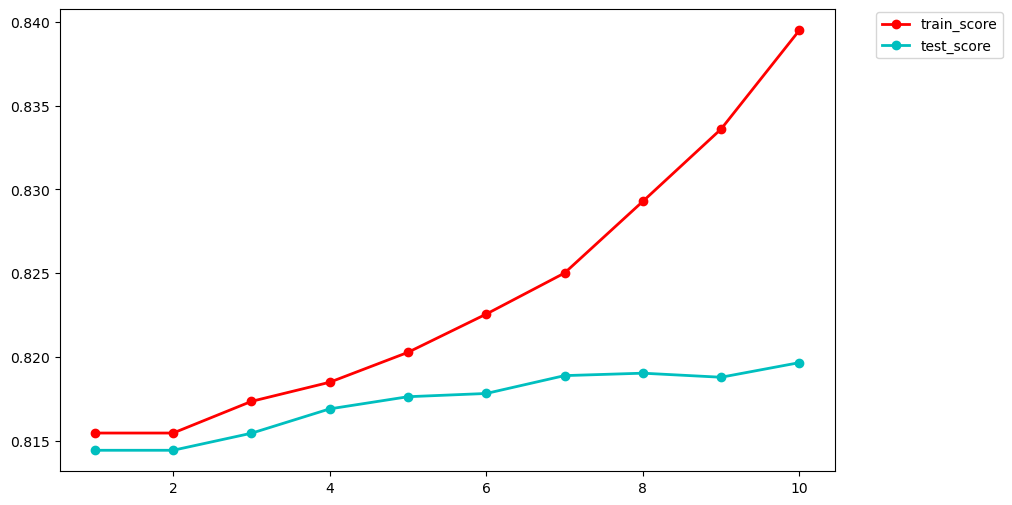

In [399]:


train_score_accuracy, test_score_acurracy, test_score_recall = [],[],[]
for depth in range(1,11):
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth).fit(X_train, y_train)
    
    pred_1 = tree.predict(X_test)
    
    train_score_accuracy.append(tree.score(X_train, y_train))
    test_score_acurracy.append(tree.score(X_test, y_test))
    test_score_recall.append(recall_score(y_true=y_test, y_pred=pred_1))
 

plt.figure(figsize=(10, 6))
plt.plot(range(1,11), train_score_accuracy,'r-o', label="train_score", linewidth=2)
plt.plot(range(1,11), test_score_acurracy,'c-o' ,label="test_score", linewidth=2)
#plt.plot(range(1,11), test_score_recall,'g-o' ,label="test_Recall", linewidth=2)
#plt.plot(range(1,11), prop,'g-o' ,label="prop", linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.2)

Dada la grafica se decide una __profundidad igual a 7__. Posteriormente entrenamos el modelo

In [44]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
arbol = DecisionTreeClassifier(random_state=0,max_depth=7).fit(X_train, y_train)
cn=['no','yes']

### RandomForestClassifier

El segundo modelo a entrenar será un modelo de de random forest, para ello en primer lugar se buscarán los hiperparámetros  n_estimators (cantidad de árboles) y max_features (la cantidad de características a considerar al buscar la mejor división o split) con tal que el modelo no se sobreajuste.

In [414]:
metrics = {'accuracy':[],
           'precision':[],
           'Recall':[],
           'n_estimator':[],
            'max_features':[]}


n_estimators_a_probar= [2**i for i in range(8)]

max_features_a_probar=[i for i in range(1,50)]

print(n_estimators_a_probar)
print(max_features_a_probar)

for i in n_estimators_a_probar:
    for j in max_features_a_probar:
        print(i,j)
        model = RandomForestClassifier(random_state=0, n_estimators=i, n_jobs=-1, max_features=j)
        model.fit(X_train, y_train)
        
        pred = model.predict(X_test)
        
        metrics['accuracy'].append(accuracy_score(y_true=y_test, y_pred=pred))
        metrics['precision'].append( precision_score(y_true=y_test, y_pred=pred,average='binary') )
        metrics['Recall' ].append( recall_score(y_true=y_test, y_pred=pred ))
        
        metrics['n_estimator'].append(i)
        metrics['max_features'].append(j)

        

[1, 2, 4, 8, 16, 32, 64, 128]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
4 40
4 41
4 42
4 43
4 44
4 45
4 46
4 47
4 48
4 49
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 1

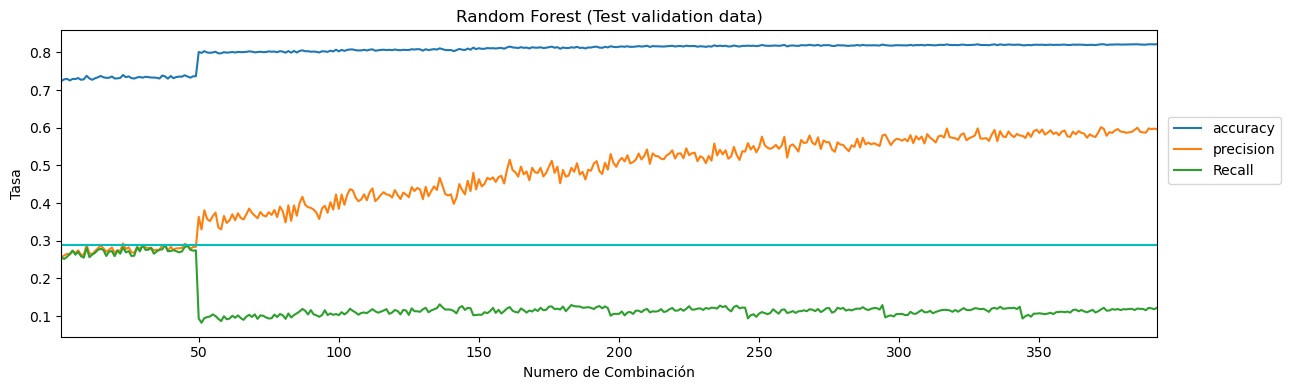

In [415]:
indice_max=metrics['Recall'].index(max(metrics['Recall']))

plt.figure(figsize=(13, 4))

largo=len(metrics['Recall'])
items=range(1,largo+1)

max_recall=[metrics['Recall'][indice_max] for i in range(largo)]

# Iterar para cada metrica
for m in metrics.keys():
    if m!='n_estimator' and  m!='max_features':
        ## Graficar la metrica
        plt.plot(items, metrics[m], label=m)
plt.plot(items,max_recall,'c-')
    
plt.title('Random Forest (Test validation data)')
plt.xlabel('Numero de Combinación')
plt.ylabel('Tasa')
plt.legend(loc=(1.01, 0.5))
plt.xlim(1, largo)
plt.tight_layout()
plt.show()

In [416]:
indice_max_2=metrics['Recall'][indice_max+1:].index(max(metrics['Recall'][indice_max+1:]))

indice_max_2=indice_max_2+indice_max+1

print("Primer max")
print("  N estimator:" ,metrics['n_estimator'][indice_max])
print("  Max features:",metrics['max_features'][indice_max])
print("  Con un Recall de:",metrics['Recall'][indice_max])

print("")
print("Segundo max")
print("  N estimator:" ,metrics['n_estimator'][indice_max_2])
print("  Max features:",metrics['max_features'][indice_max_2])
print("  Con un Recall de:",metrics['Recall'][indice_max_2])


Primer max
  N estimator: 1
  Max features: 30
  Con un Recall de: 0.2889584964761159

Segundo max
  N estimator: 1
  Max features: 38
  Con un Recall de: 0.28869746802401464


Entrenamos el modelo de RandomForestClassifier con n_estimador = 1 y max features = 30 

In [65]:
model_2 = RandomForestClassifier(random_state=0, n_estimators=1, n_jobs=-1,max_features=30).fit(X_train, y_train)

### GaussianNB con las features que se ocupan en el primer modelo (DecisionTreeClassifier)

En primer lugar se escalaron los datos con la funcion MinMaxScaler.

In [41]:
# rescale data:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


A continuacion se crea un nuevo conjunto de datos en los cuales solo están los atributos que fueron usados en el arbol del primer modelo:

In [45]:
import numpy as np

ls=arbol.feature_importances_

feature_arbol=[]

for i in range(len(ls)):
    if ls[i]>0:
        feature_arbol.append(i)

nuevos_features=len(feature_arbol)
filas_test=(X_test_scaled.shape[0])
filas_train=(X_train_scaled.shape[0])

X_test_scaled_final=np.zeros((filas_test,nuevos_features))
X_train_scaled_final=np.zeros((filas_train,nuevos_features))

for k in range(nuevos_features):
    X_test_scaled_final[:,k]=X_test_scaled[:,feature_arbol[k]]
    X_train_scaled_final[:,k]=X_train_scaled[:,feature_arbol[k]]
    

Se crea el rango de de hiperparametros a buscar con el enfoque grid search

In [58]:
a = linspace(1e-18,0.2, num=35)
b = linspace(0.2,2, num=25)
rango = np.concatenate((a, b),axis=None)
params_NB = {'var_smoothing': rango}

{'var_smoothing': array([1.00000000e-18, 5.88235294e-03, 1.17647059e-02, 1.76470588e-02,
        2.35294118e-02, 2.94117647e-02, 3.52941176e-02, 4.11764706e-02,
        4.70588235e-02, 5.29411765e-02, 5.88235294e-02, 6.47058824e-02,
        7.05882353e-02, 7.64705882e-02, 8.23529412e-02, 8.82352941e-02,
        9.41176471e-02, 1.00000000e-01, 1.05882353e-01, 1.11764706e-01,
        1.17647059e-01, 1.23529412e-01, 1.29411765e-01, 1.35294118e-01,
        1.41176471e-01, 1.47058824e-01, 1.52941176e-01, 1.58823529e-01,
        1.64705882e-01, 1.70588235e-01, 1.76470588e-01, 1.82352941e-01,
        1.88235294e-01, 1.94117647e-01, 2.00000000e-01, 2.00000000e-01,
        2.75000000e-01, 3.50000000e-01, 4.25000000e-01, 5.00000000e-01,
        5.75000000e-01, 6.50000000e-01, 7.25000000e-01, 8.00000000e-01,
        8.75000000e-01, 9.50000000e-01, 1.02500000e+00, 1.10000000e+00,
        1.17500000e+00, 1.25000000e+00, 1.32500000e+00, 1.40000000e+00,
        1.47500000e+00, 1.55000000e+00, 1.62500

A continuacion se realizará la busqueda tipo GridSearch, con cross validation, para nuestro modelo de naive Bayes, esto se realizó con el score F1-score, ya que los demas puntuadores pueden sobreajustar el modelo.

In [59]:
## Instancia y ajuste en GridSearch
GS_6 = GridSearchCV(estimator=GaussianNB(), 
                  param_grid=params_NB, 
                  cv=cvs,
                  scoring='f1',
                  n_jobs=-1).fit(X_train_scaled_final, y_train)

## Imprimir el mejor valor de hiperparametro con mejor score
print('Best parameters value')
for hiperparam, valor in GS_6.best_params_.items():
    print('{}: {}'.format(hiperparam, valor))

Best parameters value
var_smoothing: 0.005882352941176471


In [60]:
model_3 =GaussianNB(**GS_6.best_params_).fit(X_train_scaled_final, y_train)

## 5. Evaluate model performance in the predictive task across each model that you trained. Define and justify what metrics you used to assess model performance. Pick the best trained model and evaluate the following: What variables were the most influential in the prediction task? How could you improve the Performance?

### EVALUANDO MODELOS

Para evaluar los modelos nos fijaremos en dos indicadores importantes, el accuracy que es la probabilidad de acierto total y el __recall__ que este nos díra de mejor manera si nuestro modelo es correcto, ya que este indicador nos dice de __cuantos vuelos salen con retraso somos capaces de identificar.__
#### DecisionTreeClassifier

Accuracy: 0.819
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     16813
           1       0.64      0.06      0.10      3831

    accuracy                           0.82     20644
   macro avg       0.73      0.52      0.50     20644
weighted avg       0.79      0.82      0.75     20644



C:\Users\mlopez\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


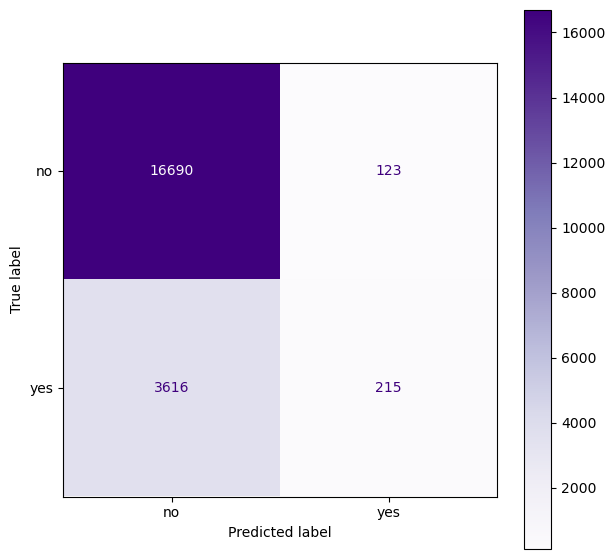

In [407]:

## Reporte de predicciones
prediccion = arbol.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, prediccion)))
print(classification_report(y_true=y_test, y_pred=prediccion))

## Grafica de matriz de confusion

fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(arbol, X_test, y_test,
                             display_labels=cn,
                             cmap=plt.cm.Purples,
                             ax=ax)
plt.show()

De este modelo podemos identificar el accuracy es bueno pero el recall es bastante malo, (recall: cuantos vuelos con retraso somos capaces de identificar).

#### RandomForestClassifier

Accuracy: 0.733
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     16813
           1       0.28      0.29      0.29      3831

    accuracy                           0.73     20644
   macro avg       0.56      0.56      0.56     20644
weighted avg       0.73      0.73      0.73     20644



C:\Users\mlopez\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


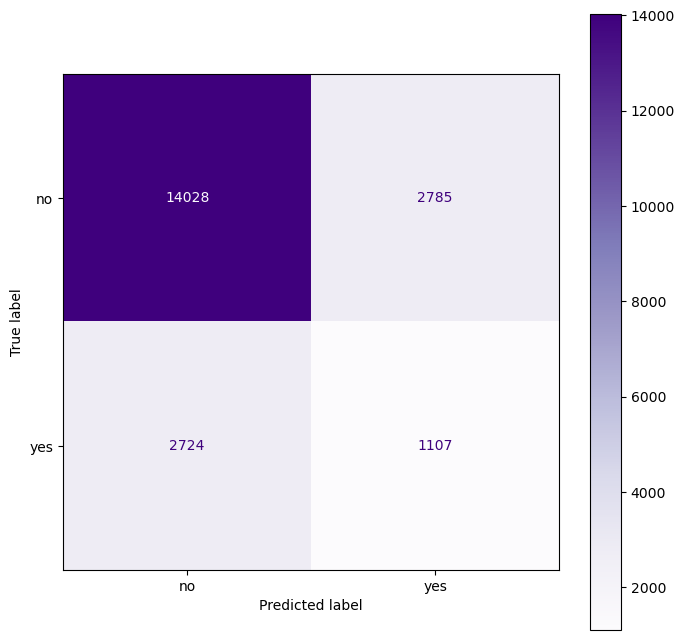

In [417]:

## Prediccion usando los test data
pred_2 = model_2.predict(X_test)


print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred_2)))

print(classification_report(y_true=y_test, y_pred=pred_2))

## Grafica de matriz de confusion
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(model_2, X_test, y_test,
                             display_labels=cn,
                             cmap=plt.cm.Purples,
                             ax=ax)
plt.show()

Para el modelo de random forest el accuracy baja con respecto al arbol de decisión pero el la capacidad de predecir si un vuelo tendrá retraso aumenta considerablemente (recall: 0.28 vs 0.06 del arbol) por lo que en funcion a lo que se busca es un mejor modelo.

Accuracy: 0.795
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     16813
           1       0.39      0.19      0.25      3831

    accuracy                           0.79     20644
   macro avg       0.61      0.56      0.57     20644
weighted avg       0.75      0.79      0.76     20644



C:\Users\mlopez\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


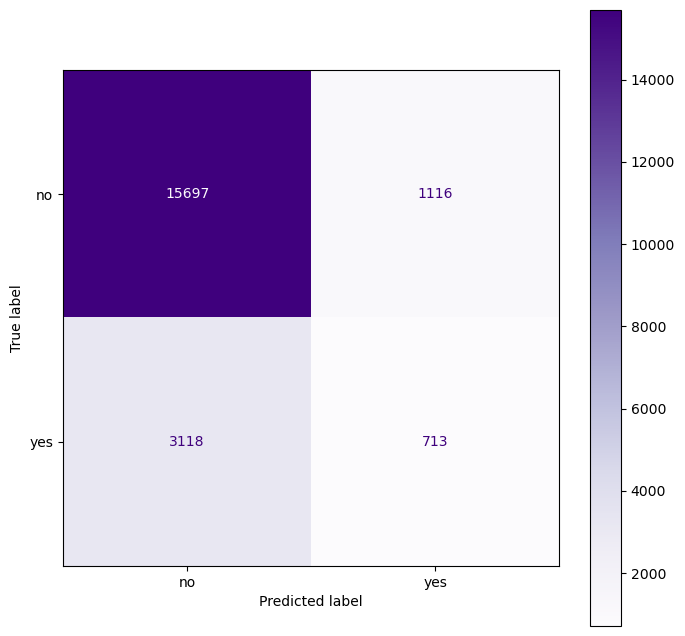

In [63]:
## Prediccion usando los test data
pred_3 = model_3.predict(X_test_scaled_final)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred_3)))
print(classification_report(y_true=y_test, y_pred=pred_3))

## Grafica de matriz de confusion
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(model_3, X_test_scaled_final, y_test,
                             display_labels=cn,
                             cmap=plt.cm.Purples,
                             ax=ax)
plt.show()

Podemos observar que el accuracy subió con respecto al mejor modelo de randomforest, pero el recall el cual es el indicador importante para este caso es peor que el obtenido en el modelo anterior.

Podemos concluir que en función de los 3 modelos propuestos, el que tiene mejor rendimiento para poder definir si un vuelo va a tener retraso es el modelo __RandomForestClassifier__ esto se debe a que es un modelo con una alta capacidad de generalización. Por lo que a continuación veremos cuales son los atributos que más ponderaron en su capacidad predictora.

Esto se realizará con el indicador __Mean decrease in impurity__ (MDI) el cual calcula la importancia de cada característica como la suma del número de divisiones (en todos los árboles) que incluyen la característica, proporcionalmente al número de muestras que divide. De esta forma se pueden indetificar los atributos que tuvieron mayor poder discriminatorio. 

In [112]:
import time
import numpy as np

start_time = time.time()
importances = model_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_2.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

largo = importances.shape[0]
importancias=[]
nombre=[]
nueva_std=[]
for i in range(largo):
    if importances[i] > 0.01:
        #print(importances[i],X_train.columns[i])
        importancias.append(importances[i])
        nombre.append(X_train.columns[i])
        nueva_std.append(std[i])
dic = {'T':'Temperatura',
       'P0': 'Presion atmosferica en la estacion',
        'P': 'Presión atmosferica a nivel de mar',
        'U': 'Humedad relativa',
        'Ff': 'Velocidad del viento',
        'Td': 'Temperatura rocio',
        'datehour': 'Hora del día',
        'high_season': 'Temporada alta'}
l = len(nombre)
for i in range(l):
    if nombre[i] in dic.keys():
        nombre[i]=dic[nombre[i]]

Elapsed time to compute the importances: 0.014 seconds


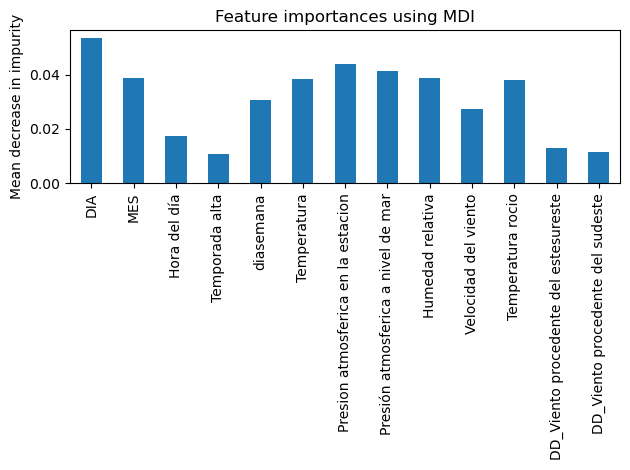

In [113]:
forest_importances = pd.Series(importancias, index=nombre)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=nueva_std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

* Las Varibles que mayor peso tienen en el modelo de __RandomForestClassifier__ son las siguientes, estas son solo las que tienen un MDI mayor a 0.01 ordenadas de mayor a menor:
    1. DIA: MDI = 0.0536 
    2. Presion atmosferica en la estacion: MDI= 0.0438
    3. Presión atmosferica a nivel de mar: MDI= 0.0412
    4. Humedad relativa: MDI= 0.0388
    5. MES: MDI= 0.0388
    6. Temperatura: MDI= 0.0382
    7. Temperatura rocio: MDI= 0.0380
    8. diasemana: MDI= 0.0305
    9. Velocidad del viento: MDI= 0.0274
    10. Hora del día: MDI= 0.0172
    11. DD_Viento procedente del estesureste: MDI= 0.0129
    12. DD_Viento procedente del sudeste: MDI= 0.0115
    13. Temporada alta: MDI= 0.0109
    

Podemos observar que por un lado las varibles que tienes un mayor peso son variables temporales como los son el día del mes, el mes, si es temporada alta o no, o la hora del día, y por otro lado variables relacionadas al clima que agregué, como lo son la presión atmosférica, la humedad relativa, la temperatura o el viento.

#### ¿Como mejoraría el modelo?

Al ver que la información climatologica fue de gran ayuda para la tarea de predecir el atraso de un vuelo, iría en busqueda de los milimitros de lluvia recibidos en el aeropuerto de pudahuel, (información que busque pero la encontre de pago en muchos lugares), o tambien buscaría informacion relacionada al trafico en la ciudad de santiago.